# Actividad 1
## Representacion de Sistemas y controladores

Se desarrollara la resolucion de los ejercicios planteados utilizando Python.
Primero, vamos a importar librerias y paquetes a utilizar.
Se debe ejecutar el siguiente código en una celda de código:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import control as ct
from control.matlab import *
from IPython.display import Image
from scipy import signal



### Circuito RLC

![Circuito RLC](images/circuit_RLC.png)


Sea el sistema eléctrico , con sus representacion en variables de estado : 

$\dot{x}=A x(t)+b u(t)$

$y=c^{T}x(t)$

Donde las matrices contienen a los coeficientes del circuito,

$ A =\begin{bmatrix}
 -R/L & -1/L \\ 
 1/C & 0 
\end{bmatrix}$

$ B = \begin{bmatrix}
1/L \\ 
0
\end{bmatrix} $

$ c^T =\begin{bmatrix}
 R & 0
\end{bmatrix} $

Para la simulacion se va a utilizar una entrada de 12V la cual cambia de signo cada 1ms

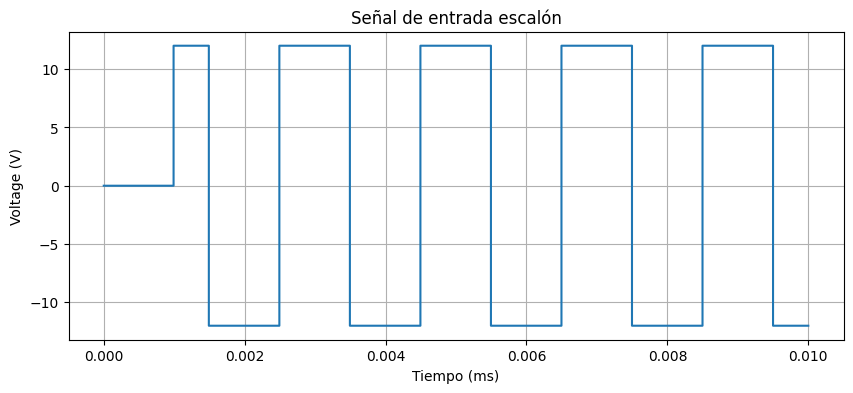

In [2]:

t_sim = 1000  # defino tiempo de simulacion en ms
t = np.linspace(0, 0.01, t_sim) #arreglo de tiempo 1ms

frecuencia = 500
delay = 0.001
entrada = 12 * signal.square(2 * np.pi * frecuencia * t - np.pi/2, duty=0.5)
entrada_delayed= np.where(t >= delay, entrada, 0)
# Visualizar la señal de entrada
plt.figure(figsize=(10, 4))
plt.plot(t, entrada_delayed, drawstyle='steps-pre')
plt.title('Señal de entrada escalón')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

En primer lugar simularemos con los siguientes valores:

- $ R = 47  \Omega $
- $ L = 1  \mu Hy $
- $ C = 100  nF $

Luego simulamos la respuesta del circuito


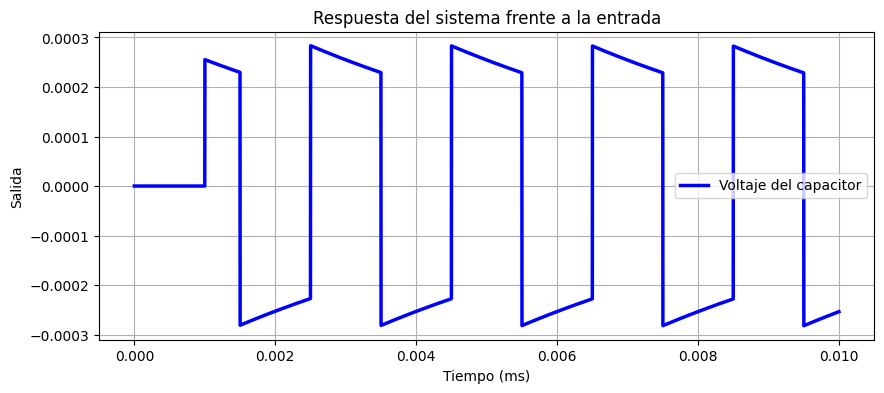

In [7]:
R=47000
L=0.00001
C=0.0000001

A=[[-R/L, -1/L], [1/C, 0]]
B=[[1/L], [0]]
C1=[[1, 0]] #Matriz para medir voltage
C2=[[0, 1]] #Matriz para medir corriente
D=[[0]]

sys1 = signal.StateSpace(A, B, C1, D) #voltaje capacitor
#sys2 = signal.StateSpace(A, B, C2, D) #corrient

t_sim = 10000  # defino tiempo de simulacion en ms
t = np.linspace(0, 0.01, t_sim) #arreglo de tiempo 1ms
frecuencia = 500
delay = 0.001
entrada = 12 * signal.square(2 * np.pi * frecuencia * t - np.pi/2, duty=0.5)
entrada_delayed= np.where(t >= delay, entrada, 0)


# Simular la respuesta del sistema
t1,y1,x1= signal.lsim(sys1,entrada_delayed, t) # simular sistemas lineales e invariantes en el tiempo (LTI)
#t2,y2,x2= signal.lsim(sys2,entrada_delayed, t) # simular sistemas lineales e invariantes en el tiempo (LTI)

# Visualizar la salida del sistema
plt.figure(figsize=(10, 4))
plt.plot(t1, y1, 'b-', linewidth=2.5, label='Voltaje del capacitor')
#plt.plot(t2, y2, 'r--', linewidth=2.5, label='Corriente')
plt.grid()
plt.title('Respuesta del sistema frente a la entrada')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Salida')
plt.legend()
plt.grid(True)
plt.show()


